In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

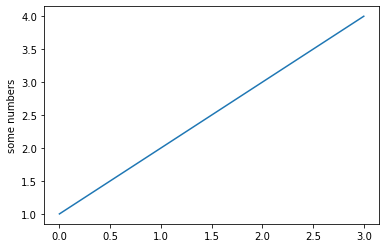

       housing_median_age  population  median_income
5967                 19.0      1126.0         3.8929
17744                15.0      1150.0         7.1267
952                  15.0      2484.0         5.0143
9361                 36.0      1549.0         8.3935
11024                29.0       724.0         4.8542
...                   ...         ...            ...
11284                35.0       658.0         6.3700
11964                33.0      1753.0         3.0500
5390                 36.0      1756.0         2.9344
860                  15.0      1777.0         5.7192
15795                52.0      2619.0         2.5755

[10320 rows x 3 columns]


,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
10907,171400.0
3231,97400.0
18240,316700.0
2484,70000.0


In [71]:
#show that pandas is loaded correctly
data = pd.read_csv("housing.csv")
print(data)
#split data used for model
houseData = data[['housing_median_age','population', 'median_income']]
result = data[['median_house_value']]


#show numpy is loaded correctly
a = np.arange(15).reshape(3, 5)
print(a)

#show matplotlib is loaded correctly
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

#show sklearn is loaded correctly
X_train, X_test, y_train, y_test = train_test_split(houseData, result, test_size=0.5, random_state=42)
print(X_train)
houseData


In [26]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

print(calc_vif(houseData))

            variables       VIF
0  housing_median_age  2.886159
1          population  2.054357
2       median_income  3.360597



## Explanation of the model  

#### Choice of model.   

I have chosen to create a logistic regression of this model using a subset of the independent variables, specifically an ordinary least squares model. Variables were removed until no multicollinearities existed, these included all but median age, population, and median income. The regressions from these models give a clear idea of how each independent variable affects the total price, as you can see from their coefficients. It is also a simpler model, which allows for it to be created and run efficiently. The model accuracy might suffer due to the inherent simple nature compared to some of the more complex modeling algorithims, however it's simplicity is useful in the speed and clarity.  


Another model that could work would be a random forest to model the appreciation of real estate pricing over time. This is due to the ability of a decision tree to accurately model the relationship between independent variables without regard to their collinearity (Larose, 2019). Random forests are also able to handle regression and therefore continuous variables instead of simply categorical data. This model would be able to handle more independent variables even though there exists high collinearity between the variables.


####   Choice of Variables.    

The variables that I have chosen to use in order to predict the appreciation over time are as follows:

Housing Median Age: The average age of the houses that are in the group. This is important to the overall model since finding the relationship between the age and price is the goal of the prediction.    

Population: Population is important in relation to the housing price as housing in more densely populated areas tends to be more expensive. Houses that exist in rural areas with a larger ratio of space to people are on average less expensive than those in metropolitan areas. Population is therefore a good representation of that statistic.   


Median Income: This is directly representative of the median house price as well. Two identical houses in cities with different economic baselines are going to have wildly different prices. For example a house in Casper, WY and a house in Seattle, WA could be identical, but since the median income is higher in Seattle it stands to reason that the house prices will naturally be higher.     
  
  
Median Housing Value: This is the dependent variable that the model is trying to predict. This is related to all of the independent variables that were chosen earlier.    




In [74]:
###This is a test linear regression, I found it inaccurate and decided to use an OLS model instead.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [[1.81450929e+03 3.04085300e+00 4.30734563e+04]]
Mean squared error: 6499602919.91
Coefficient of determination: 0.51


,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
10907,171400.0
3231,97400.0
18240,316700.0
2484,70000.0


                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          2.591e+04
Date:                Wed, 03 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:24:57   Log-Likelihood:                     -1.3129e+05
No. Observations:               10320   AIC:                                  2.626e+05
Df Residuals:                   10317   BIC:                                  2.626e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

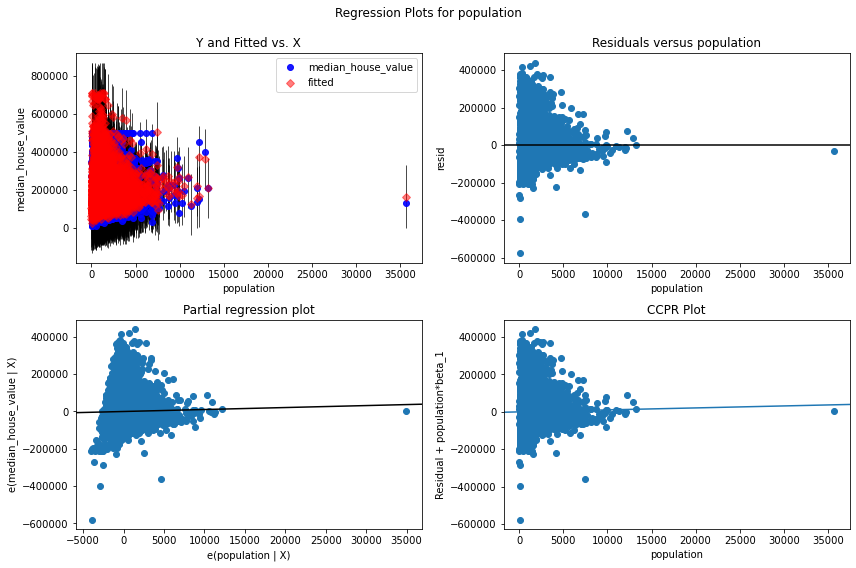

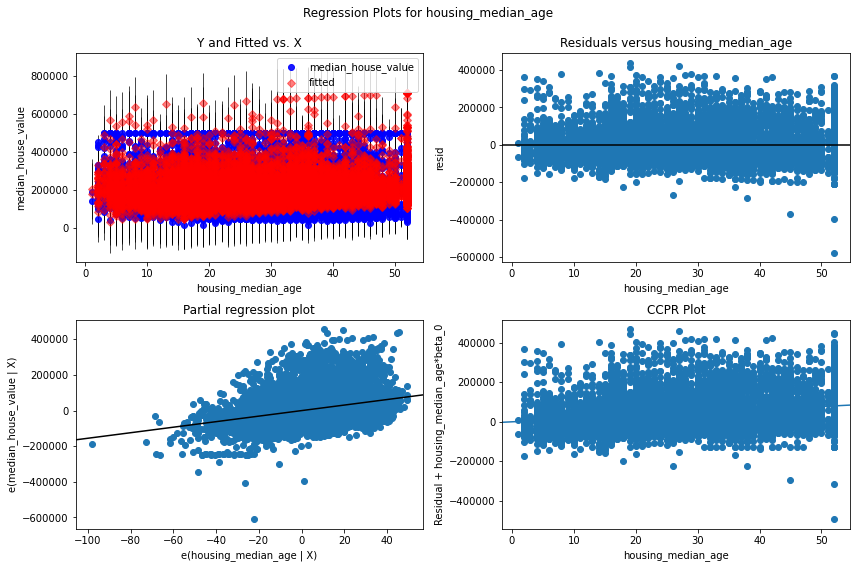

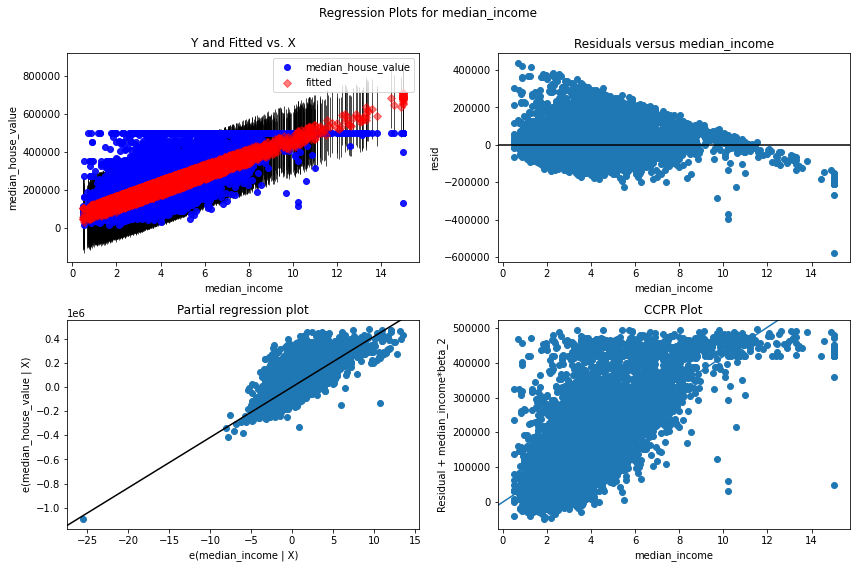

In [114]:
olsModel = sm.OLS(y_train, X_train)
fitModel = olsModel.fit()
print(fitModel.summary())

result = fitModel.predict(X_test)
print("MSE residuals is");print(fitModel.mse_resid)
print("MSE total is ");print(fitModel.mse_total)
fig1 = plt.figure(figsize=(12,8))
fig1 = sm.graphics.plot_regress_exog(fitModel, 'population', fig=fig1)

fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(fitModel, 'housing_median_age', fig=fig2)

fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(fitModel, 'median_income', fig=fig3)


## Results.  

Overall the Linear model I created to predict the housing prices is wildly inaccurate. The R-squared value does say that over 88% of the variation in the model is described by the three variables that were used. However the AIC value is very high, being 2.6e^5. Similarly the mean squared error of the model as a whole is incredibly large at 56billion. 
A large amount of this variance comes from the median income variable, as the coefficient that is trained for that variable is a positive correlation of 41708. This indicates that for every increase in the median income by 1, there is a change of over 40,000$ in the median housing price. The median age makes more sense as the house each year the house gets older then the price of the house increases by 1500$. 
The factors that influence the accuracy of the model are shown in the residual plots. There are outliers in each of the different independent variables that are on the high end of the data. There is also a tendency of all of the residuals to be right skewed, which shows that there is a majority of the data points to the low end. The distance from the the points to the line of best fit is also shows especially in the population that there is high variance in relation to the predicted median price. 



## Works Cited.   

How is the error calculated in a linear regression model? Scribbr. (2020, October 12). Retrieved November 3, 2021, from https://www.scribbr.com/frequently-asked-questions/error-in-a-linear-regression-model/. 

Larose C. D., & Larose D. T. (2019). Data science using Python and R. ﻿John Wiley & Sons, Inc. ﻿﻿ISBN-13: 9781119526841

Multicollinearity: Detecting multicollinearity with VIF. Analytics Vidhya. (2020, April 16). Retrieved October 28, 2021, from https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/. 


Statistics by Jim. Statistics By Jim. (2021, September 17). Retrieved November 3, 2021, from https://statisticsbyjim.com/. 

Zach. (2021, May 31). How to create a residual plot in Python. Statology. Retrieved November 3, 2021, from https://www.statology.org/residual-plot-python/. 
